# CS5500 : Reinforcement Learning

# Assignment № 4



# Gantasala Naga Aneesh Ajaroy

# CS19BTECH11010

## Problem 3 : Policy Gradient

## LunarLander-v2 Environment

### Import Required  Libraries

In [1]:
import gym
import random
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

In [2]:
pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 35.5 MB/s 
     |████████████████████████████████| 18.3 MB 52.7 MB/s 
     |████████████████████████████████| 2.1 MB 44.5 MB/s 


# 3a)

## Printing State and Action Spaces

In [3]:
def load_env(name):
    env = gym.make(name)
    print("The environment {} is created".format(name))
    
    Observation_Space = env.observation_space
    Action_Space = env.action_space
    
    print("The Observation Space : {}".format(Observation_Space))
    states = Observation_Space.shape
    print("Number of Observations or Dimensions in State : {}".format(states))
    print("The First dimension represents Position in x")
    print("The Second dimension represents Position in y")
    print("The Third dimension represents Velocity in x")
    print("The Fourth dimension represents Velocity in y")
    print("The Fifth dimension represents Angle")
    print("The Sixth dimension represents Angular Velocity")
    print("The Seventh dimension represents Right Leg in contact with ground")
    print("The Eigth dimension represents Left Leg in contact with ground")
    print("Box represents a continuous ndarray")
    Upper = Observation_Space.high
    Lower = Observation_Space.low
    print("Position x is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[0],Upper[0]))
    print("Position y is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[1],Upper[1]))
    print("Velocity x is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[2],Upper[2]))
    print("Velocity y is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[3],Upper[3]))
    print("Angle is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[4],Upper[4]))
    print("Angular Velocity is bounded by [{0:8.5f},{1:8.5f}]".format(Lower[5],Upper[5]))
    print("Right leg Contant is boolean '0' or '1' ")
    print("Left leg Contant is boolean '0' or '1' ")
    
    print("The Action Space : {}".format(Action_Space))
    actions = Action_Space.n
    print("Number of valid Actions : {}".format(actions))
    print("The discrete Deterministic actions are 0, 1, 2, 3 ")
    print("0 -> Do Nothing")
    print("1 -> Fire Left Orientation Engine")
    print("2 -> Fire Main Engine")
    print("3 -> Fire Right Orientation Engine")
    return env
    

In [4]:
Environment = load_env("LunarLander-v2")

The environment LunarLander-v2 is created
The Observation Space : Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Number of Observations or Dimensions in State : (8,)
The First dimension represents Position in x
The Second dimension represents Position in y
The Third dimension represents Velocity in x
The Fourth dimension represents Velocity in y
The Fifth dimension represents Angle
The Sixth dimension represents Angular Velocity
The Seventh dimension represents Right Leg in contact with ground
The Eigth dimension represents Left Leg in contact with ground
Box represents a continuous ndarray
Position x is bounded by [-1.50000, 1.50000]
Position y is bounded by [-1.50000, 1.50000]
Velocity x is bounded by [-5.00000, 5.00000]
Velocity y is bounded by [-5.00000, 5.00000]
Angle is bounded by [-3.14159, 3.14159]
Angular Velocity is bounded by [-5.00000, 5.0000

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


## Plotting Reward function with Random Agent

In [5]:
def reward_plot(env):
    Reward = []
    position_x = []
    position_y = []
    velocity_x = []
    velocity_y = []
    Action = []
    Angle = []
    Ang_Velocity = []
    left = []
    right = []
    for ep in range(1000):
        env.reset()
        while True:
            num_actions = env.action_space.n
            action_space = list(range(num_actions))
            A = random.sample(action_space,1)
            observation, reward, terminated,_ = env.step(A[0])
            
            Action.append(A[0])
            Reward.append(reward)
            position_x.append(observation[0])
            position_y.append(observation[1])
            velocity_x.append(observation[2])
            velocity_y.append(observation[3])
            Angle.append(observation[4])
            Ang_Velocity.append(observation[5])
            left.append(observation[6])
            right.append(observation[7])
            if terminated:
                break
                
    plt.subplots(figsize=(95,10))
    
    plt.subplot(1, 9, 1)
    plt.plot(position_x, Reward, 'r')
    plt.xlabel('position_x')
    plt.ylabel('reward')

    plt.subplot(1, 9, 2)
    plt.plot(position_y, Reward, 'r')
    plt.xlabel('position_y')
    plt.ylabel('reward')

    plt.subplot(1, 9, 3)
    plt.plot(velocity_x, Reward, 'g')
    plt.xlabel('velocity_x')
    plt.ylabel('reward')

    plt.subplot(1, 9, 4)
    plt.plot(velocity_y, Reward, 'g')
    plt.xlabel('velocity_y')
    plt.ylabel('reward')
    
    plt.subplot(1, 9, 5)
    plt.plot(Angle, Reward, c = 'b')
    plt.xlabel('Angle')
    plt.ylabel('reward')
    
    plt.subplot(1, 9, 6)
    plt.plot(Ang_Velocity, Reward, c = 'y')
    plt.xlabel('Ang_Velocity')
    plt.ylabel('reward')

    plt.subplot(1, 9, 7)
    plt.scatter(left, Reward, c = 'y')
    plt.xlabel('left landing')
    plt.ylabel('reward')

    plt.subplot(1, 9, 8)
    plt.scatter(right, Reward, c = 'y')
    plt.xlabel('right landing')
    plt.ylabel('reward')
    
    plt.subplot(1, 9, 9)
    plt.scatter(Action, Reward, c = 'c')
    plt.xlabel('action')
    plt.ylabel('reward')
    
    
    
    
    
    plt.show()
        

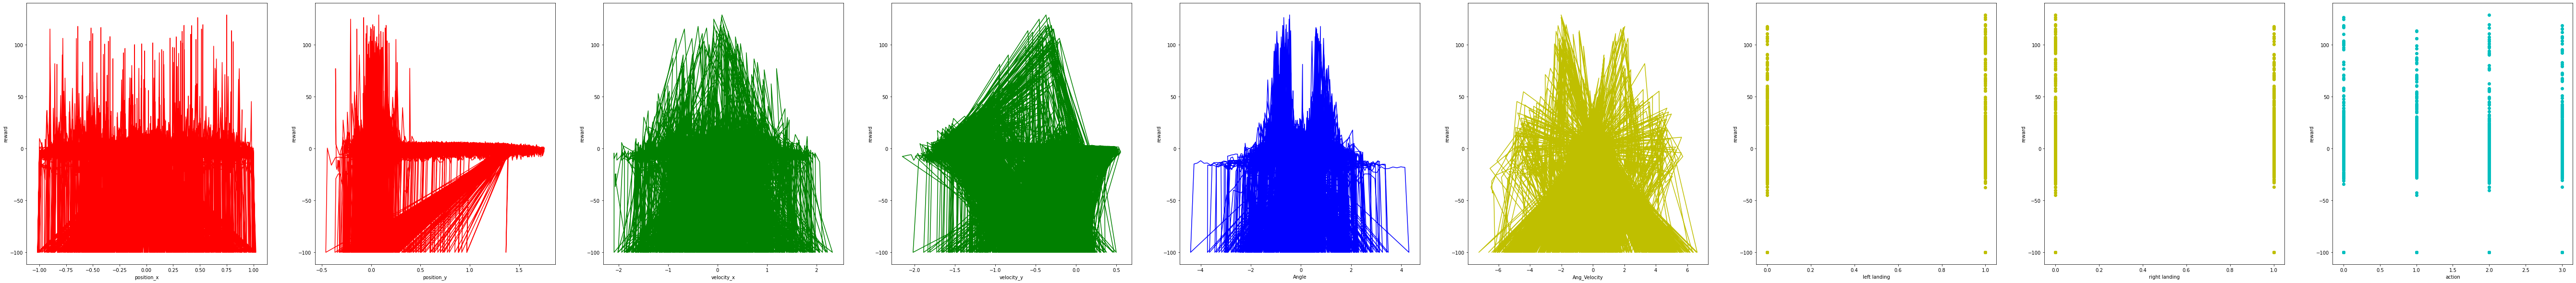

In [6]:
reward_plot(Environment)

# 3b)

## Policy Gradient Algorithm

### Deep Neural Model

In [7]:
class Model(nn.Module):
    def __init__(self, input_layer,hidden_dimension,num_actions):
        super(Model, self).__init__()
        self.Net = nn.Sequential(nn.Linear(input_layer, hidden_dimension, bias=False),
                                   nn.ReLU(),
                                   nn.Linear(hidden_dimension,num_actions,bias=False),
                                   nn.Softmax(dim=-1))
        
    def forward(self,x):
        return self.Net(x)

### Agent Class for Creating, Training and  Optimizing our RL Agent

In [8]:
class Agent:
    
    def __init__(self, lr, num_actions, batch_size, input_layer, gamma, iterations,rw_t_g = True, Adv_N = True):
        
        self.action_space = [i for i in range(num_actions)]
        self.batch_size = batch_size
        self.step_counter = 0
        self.lr = lr
        self.device = "cuda:0"
        self.Train_Net = Model(input_layer,1024,num_actions).to(self.device)
        self.optimizer = optim.Adam(self.Train_Net.parameters(),lr=lr)
        self.reward_to_go = rw_t_g
        self.Advantage_Norm = Adv_N
        self.gamma = gamma
        self.iterations = iterations


    def policy(self,observation):
        
        probs = self.Train_Net(observation.to(self.device))
        m = Categorical(probs)
        action = m.sample()
        return action, m.log_prob(action)
    
    def get_torch_state(self,observation):
        
        state = np.array(observation)
        state = torch.from_numpy(state)
        state = state.type(torch.FloatTensor)
        state = state.unsqueeze(0)
        return state


    def optimize(self,Batch_Policy_History,Batch_Episode_Reward):
        
        if self.Advantage_Norm:
            baseline = 0.
            for eps in Batch_Episode_Reward:
                R = 0
                rewards = []
                for r in eps[::-1]:
                    R = r + self.gamma * R
                baseline += R
            baseline /= self.batch_size

        
        loss = 0.
        for i in range(len(Batch_Episode_Reward)):
            p = Batch_Policy_History[i]
            e = Batch_Episode_Reward[i]
            R = 0
            rewards = []
            for r in e[::-1]:
                R = r + self.gamma * R
                rewards.insert(0,R)
            
            p = torch.cat(p).type(torch.FloatTensor)
            rewards = torch.FloatTensor(rewards)
            
            if self.reward_to_go:
                if self.Advantage_Norm:
                    rewards =  rewards - baseline
                    rewards = (rewards - rewards.mean()) / (rewards.std() + np.finfo(np.float32).eps)

                loss += torch.sum(torch.mul(p,rewards).mul(-1), -1)
            else:
                loss += torch.sum(torch.mul(p,rewards[0]).mul(-1), -1)
    
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


    def train(self,env):
    
        rewards = []
        
        for i in range(self.iterations):   
            Batch_Episode_Reward = []
            Batch_Policy_History = []
            episode = 0
            while episode < self.batch_size:
                state = env.reset()
                state = self.get_torch_state(state)
                episode_rewards = []
                policy_history = []
                terminated = False
                while (not terminated):
                    action, policy_log = self.policy(state)
                    action = action.item()
                    observation,reward,terminated,_ = env.step(action)
                    state  =  self.get_torch_state(observation)
                    episode_rewards.append(reward)
                    policy_history.append(policy_log)
            
                Batch_Episode_Reward.append(episode_rewards)
                Batch_Policy_History.append(policy_history)
                episode+=1
            
            rewards.append(np.mean([np.sum(er) for er in Batch_Episode_Reward]))
            self.optimize(Batch_Policy_History,Batch_Episode_Reward)

            print('Total Reward for Iteration {} : {}'.format(i,rewards[-1]))   
        env.close()
    
        plt.plot(rewards,label='Mean Reward')
        plt.xlabel('Episodes')
        plt.ylabel('Reward')
        plt.legend()
        plt.grid()
        plt.show()

        return rewards
    
    




# A Deep Neural Dense Network with one Hidden Layer of size 1024

## Reward to Go = True
## Advantage Norm = True

Total Reward for Iteration 0 : -164.5954785011837
Total Reward for Iteration 1 : -606.02579713998
Total Reward for Iteration 2 : -579.6822059976367
Total Reward for Iteration 3 : -848.1762695355136
Total Reward for Iteration 4 : -30.75806029416902
Total Reward for Iteration 5 : 19.99898385367527
Total Reward for Iteration 6 : 21.82104119035685
Total Reward for Iteration 7 : -49.529997229938516
Total Reward for Iteration 8 : -173.2205679082382
Total Reward for Iteration 9 : -258.97478354178986
Total Reward for Iteration 10 : -136.07506958394964
Total Reward for Iteration 11 : 16.384323693484077
Total Reward for Iteration 12 : 122.64936131224607
Total Reward for Iteration 13 : 118.90150667472136
Total Reward for Iteration 14 : 137.9093160837905
Total Reward for Iteration 15 : 155.5237630169295
Total Reward for Iteration 16 : 132.9889071530686
Total Reward for Iteration 17 : 109.20568477663639
Total Reward for Iteration 18 : 76.344506201558
Total Reward for Iteration 19 : 69.0353818137565

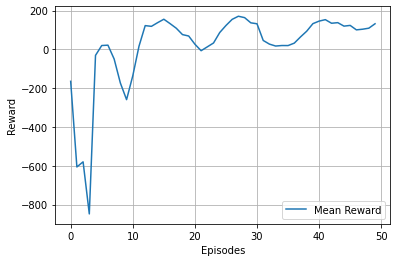

In [9]:
env = gym.make("LunarLander-v2")
agent = Agent(lr = 0.02, num_actions = env.action_space.n, batch_size = 64, input_layer = env.observation_space.shape[0], gamma = 0.99, iterations = 50,rw_t_g = True, Adv_N = True)
x1 = agent.train(env)

## Reward to Go = True
## Advantage Norm = False



Total Reward for Iteration 0 : -192.56568708939324
Total Reward for Iteration 1 : -271.43189600367543
Total Reward for Iteration 2 : -456.72199024280053
Total Reward for Iteration 3 : -601.332491670413
Total Reward for Iteration 4 : -554.4051286642119
Total Reward for Iteration 5 : -496.1503936591315
Total Reward for Iteration 6 : -544.6133774083651
Total Reward for Iteration 7 : -551.3363261219843
Total Reward for Iteration 8 : -558.8458502260139
Total Reward for Iteration 9 : -532.0508968560425
Total Reward for Iteration 10 : -524.7892924514651
Total Reward for Iteration 11 : -505.2893458449443
Total Reward for Iteration 12 : -523.9072068879104
Total Reward for Iteration 13 : -513.4314555633324
Total Reward for Iteration 14 : -531.5131262955691
Total Reward for Iteration 15 : -534.1011007936874
Total Reward for Iteration 16 : -561.9822103451795
Total Reward for Iteration 17 : -568.4989168012976
Total Reward for Iteration 18 : -588.8103527160911
Total Reward for Iteration 19 : -556.73

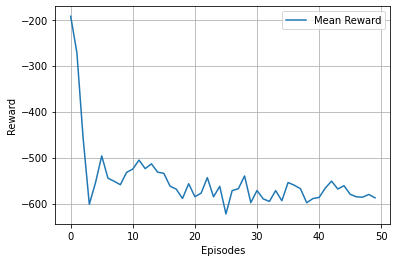

In [10]:
env = gym.make("LunarLander-v2")
agent = Agent(lr = 0.02, num_actions = env.action_space.n, batch_size = 64, input_layer = env.observation_space.shape[0], gamma = 0.99, iterations = 50,rw_t_g = True, Adv_N = False)
x2 = agent.train(env)

## Reward to Go = False
## Advantage Norm = False

Total Reward for Iteration 0 : -211.616248608183
Total Reward for Iteration 1 : -148.6980032917632
Total Reward for Iteration 2 : -122.0460616714083
Total Reward for Iteration 3 : -133.21829986956132
Total Reward for Iteration 4 : -128.5085519141927
Total Reward for Iteration 5 : -126.91523961314647
Total Reward for Iteration 6 : -131.26658906492986
Total Reward for Iteration 7 : -125.85128395618918
Total Reward for Iteration 8 : -121.80743713017807
Total Reward for Iteration 9 : -135.49162532024542
Total Reward for Iteration 10 : -134.06177098832708
Total Reward for Iteration 11 : -124.87665606408353
Total Reward for Iteration 12 : -126.59521354475488
Total Reward for Iteration 13 : -123.74037427209888
Total Reward for Iteration 14 : -126.64900508377318
Total Reward for Iteration 15 : -132.48009584705625
Total Reward for Iteration 16 : -131.19913907211605
Total Reward for Iteration 17 : -118.63497431899344
Total Reward for Iteration 18 : -122.79316491580602
Total Reward for Iteration 

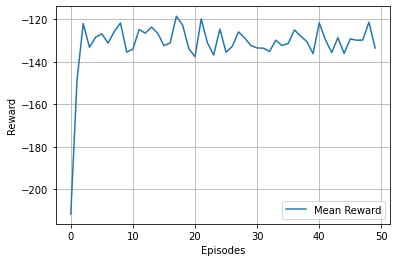

In [11]:
env = gym.make("LunarLander-v2")
agent = Agent(lr = 0.02, num_actions = env.action_space.n, batch_size = 64, input_layer = env.observation_space.shape[0], gamma = 0.99, iterations = 50,rw_t_g = False, Adv_N = False)
x3 = agent.train(env)

## Reward to Go = False
## Advantage Norm = True

Total Reward for Iteration 0 : -151.6239561688377
Total Reward for Iteration 1 : -424.4833278785032
Total Reward for Iteration 2 : -120.7111064647577
Total Reward for Iteration 3 : -94.68941316178504
Total Reward for Iteration 4 : -137.04607643330849
Total Reward for Iteration 5 : -128.48524496760075
Total Reward for Iteration 6 : -134.1785462028416
Total Reward for Iteration 7 : -132.58578755965178
Total Reward for Iteration 8 : -121.80531655666903
Total Reward for Iteration 9 : -132.82423551185036
Total Reward for Iteration 10 : -130.3136769858602
Total Reward for Iteration 11 : -133.12139723612302
Total Reward for Iteration 12 : -131.98181572882032
Total Reward for Iteration 13 : -122.36405212464439
Total Reward for Iteration 14 : -127.46092533968257
Total Reward for Iteration 15 : -138.72390810574012
Total Reward for Iteration 16 : -127.22349412365774
Total Reward for Iteration 17 : -127.15300099425161
Total Reward for Iteration 18 : -129.149664564935
Total Reward for Iteration 19 

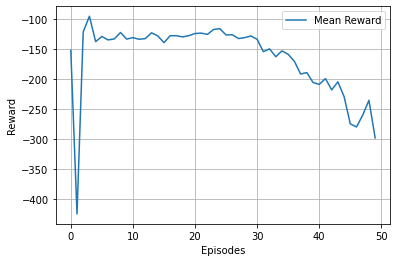

In [12]:
env = gym.make("LunarLander-v2")
agent = Agent(lr = 0.02, num_actions = env.action_space.n, batch_size = 64, input_layer = env.observation_space.shape[0], gamma = 0.99, iterations = 50,rw_t_g = False, Adv_N = True)
x4 = agent.train(env)

## Comparison of Learning Curves with and without Reward-to-go and Advantage Normalization

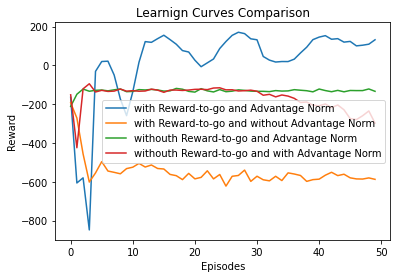

In [13]:
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Learnign Curves Comparison")
plt.plot(x1,label = "with Reward-to-go and Advantage Norm")
plt.plot(x2,label = "with Reward-to-go and without Advantage Norm")
plt.plot(x3,label = "withouth Reward-to-go and Advantage Norm")
plt.plot(x4,label = "withouth Reward-to-go and with Advantage Norm")
plt.legend()
plt.show()

## By observing the learning curves, we can conclude that, when using reward to go 
## model converges and performs best with Advantage Norm slightly improving the rate of convergence

## On the other hand, without reward to go model doesn't converge with the one having Advantage norm performing slightly better

Total Reward for Iteration 0 : -282.44168183264287
Total Reward for Iteration 1 : -729.3935010716614
Total Reward for Iteration 2 : -310.76025392475674
Total Reward for Iteration 3 : -162.57987736076427
Total Reward for Iteration 4 : -51.154910448618054
Total Reward for Iteration 5 : -86.02860638103905
Total Reward for Iteration 6 : -132.02893043254377
Total Reward for Iteration 7 : -94.67817288244076
Total Reward for Iteration 8 : -86.372932983669
Total Reward for Iteration 9 : -85.6992684175564
Total Reward for Iteration 10 : -72.60036906848507
Total Reward for Iteration 11 : -91.6735107188659
Total Reward for Iteration 12 : -83.7566520863542
Total Reward for Iteration 13 : -65.60149677111765
Total Reward for Iteration 14 : -58.699575579849366
Total Reward for Iteration 15 : -54.38060791885134
Total Reward for Iteration 16 : -60.681884418285115
Total Reward for Iteration 17 : -81.30831445372951
Total Reward for Iteration 18 : -77.05380869634777
Total Reward for Iteration 19 : -112.10

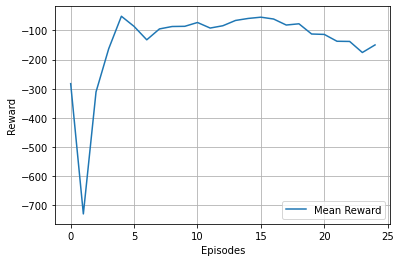

Total Reward for Iteration 0 : -275.48384565622007
Total Reward for Iteration 1 : -495.0244647847925
Total Reward for Iteration 2 : -468.5423180577325
Total Reward for Iteration 3 : -529.6367720400742
Total Reward for Iteration 4 : -694.5888785539438
Total Reward for Iteration 5 : -675.2671084639057
Total Reward for Iteration 6 : -803.9326003972311
Total Reward for Iteration 7 : -766.412147292632
Total Reward for Iteration 8 : -881.5936067991386
Total Reward for Iteration 9 : -800.1680848493944
Total Reward for Iteration 10 : -791.8841525695836
Total Reward for Iteration 11 : -774.1783172765515
Total Reward for Iteration 12 : -1240.3373774980546
Total Reward for Iteration 13 : -1277.596528723218
Total Reward for Iteration 14 : -1032.526038927347
Total Reward for Iteration 15 : -783.8460422716648
Total Reward for Iteration 16 : -790.8101023569785
Total Reward for Iteration 17 : -725.8117779303657
Total Reward for Iteration 18 : -755.1479307178988
Total Reward for Iteration 19 : -975.902

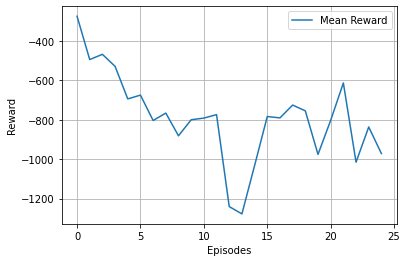

Total Reward for Iteration 0 : -178.73133267227053
Total Reward for Iteration 1 : -389.19416430883723
Total Reward for Iteration 2 : -373.6284051632605
Total Reward for Iteration 3 : -167.17470480906607
Total Reward for Iteration 4 : -138.35372348133978
Total Reward for Iteration 5 : -134.69383834017395
Total Reward for Iteration 6 : -109.9359040928764
Total Reward for Iteration 7 : -153.36698993688316
Total Reward for Iteration 8 : -119.24759694304501
Total Reward for Iteration 9 : -88.09253732876768
Total Reward for Iteration 10 : -47.65383317838551
Total Reward for Iteration 11 : -56.40859682810249
Total Reward for Iteration 12 : -60.20047552174874
Total Reward for Iteration 13 : -47.42177173106553
Total Reward for Iteration 14 : -22.798790095949922
Total Reward for Iteration 15 : -64.18903819848822
Total Reward for Iteration 16 : -72.2857449058317
Total Reward for Iteration 17 : -23.396680329007204
Total Reward for Iteration 18 : -72.78898832935168
Total Reward for Iteration 19 : -

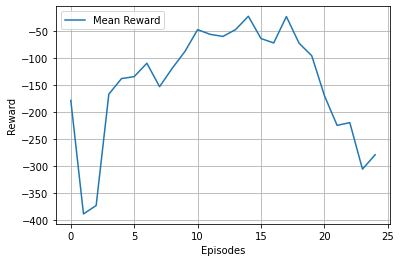

Total Reward for Iteration 0 : -159.9930132520759
Total Reward for Iteration 1 : -691.541621148937
Total Reward for Iteration 2 : -618.2058039318731
Total Reward for Iteration 3 : -188.8640972962313
Total Reward for Iteration 4 : -167.48355832199456
Total Reward for Iteration 5 : -135.79002162282023
Total Reward for Iteration 6 : -153.74136247532113
Total Reward for Iteration 7 : -181.381477312347
Total Reward for Iteration 8 : -158.105213554684
Total Reward for Iteration 9 : -171.72751937686397
Total Reward for Iteration 10 : -135.35049649904596
Total Reward for Iteration 11 : -141.5034511237621
Total Reward for Iteration 12 : -138.81924929754447
Total Reward for Iteration 13 : -134.1822095143698
Total Reward for Iteration 14 : -135.16465504438088
Total Reward for Iteration 15 : -143.86045692602255
Total Reward for Iteration 16 : -120.3678934640461
Total Reward for Iteration 17 : -125.98215959035596
Total Reward for Iteration 18 : -120.02002981262507
Total Reward for Iteration 19 : -1

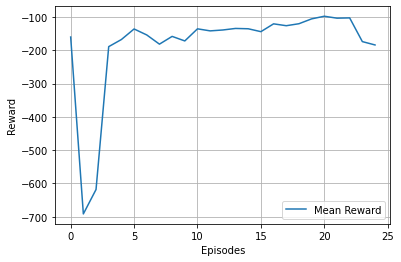

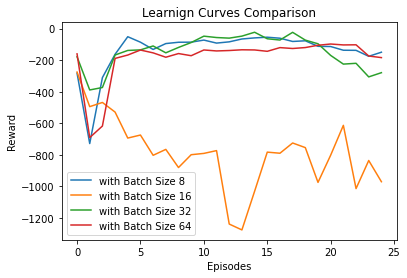

In [14]:
rew = []
batch_size = [8,16,32,64]
for b in batch_size:
  env = gym.make("LunarLander-v2")
  agent = Agent(lr = 0.02, num_actions = env.action_space.n, batch_size = b, input_layer = env.observation_space.shape[0], gamma = 0.99, iterations = 25,rw_t_g = True, Adv_N = True)
  x = agent.train(env)
  rew.append(x)

plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Learnign Curves Comparison")
plt.plot(rew[0],label = "with Batch Size 8")
plt.plot(rew[1],label = "with Batch Size 16")
plt.plot(rew[2],label = "with Batch Size 32")
plt.plot(rew[3],label = "with Batch Size 64")
plt.legend()
plt.show()



## From above model,we can infer that using larger Batch Size makes our model converge significantly faster